In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('question3.csv', header=None, names= list(range(1,32)))
df = pd.get_dummies(df,columns=[2, 7, 8, 14, 15, 16, 26, 29],drop_first=False)
df_train, df_test = train_test_split(df, test_size=1/3, random_state=1)
X_train = df_train.loc[:, df_train.columns !=31]
Y_train = df_train.loc[:, df_train.columns ==31]
X_test = df_test.loc[:, df_test.columns !=31]
Y_test = df_test.loc[:, df_test.columns ==31]
X_train = np.array(X_train)
Y_train = np.array(Y_train[31])

X_test = np.array(X_test)
Y_test = np.array(Y_test[31])

In [3]:
import time
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
Cval = [1,5,10,20,30,50,75,100,120,150,170,200,250]
Time =[];Accuracy =[]
for C in Cval:
    t1 = time.time()
    model = SVC(C,kernel='linear')
    model.fit(X_train,Y_train)
    t2 = time.time()
    Y_predicted = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    sumOfaccuracy = 0
    for train, test in kf.split(X_train):
        X_train_data = X_train[train]
        X_test_data = X_train[test]
        Y_train_data = Y_train[train]
        Y_test_data = Y_train[test]
        model.fit(X_train_data,Y_train_data)
        Y_predict_data = model.predict(X_test_data)
    Time.append(t2-t1)
    Accuracy.append(sumOfaccuracy/3)

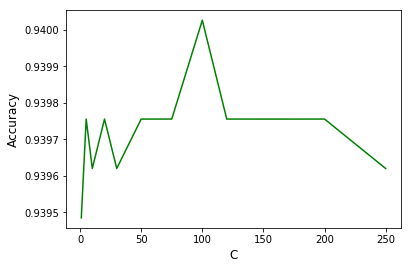

In [4]:
import matplotlib.pyplot as plt
plt.plot(Cval,Accuracy,color='green',markersize=14)
plt.xlabel('C',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## Plot of Accuracy with C in Linear Kernel

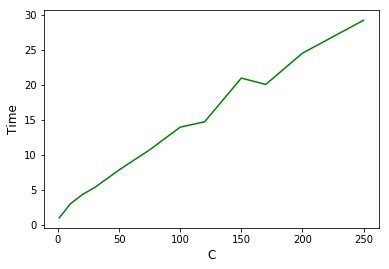

In [6]:
plt.plot(Cval,Time,color='green',markersize=14)
plt.xlabel('C',fontsize=12)
plt.ylabel('Time',fontsize=12)
plt.show()

## Plot of Time with C in Linear Kernel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The best classifier is:  SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Best score:  0.959715157681


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


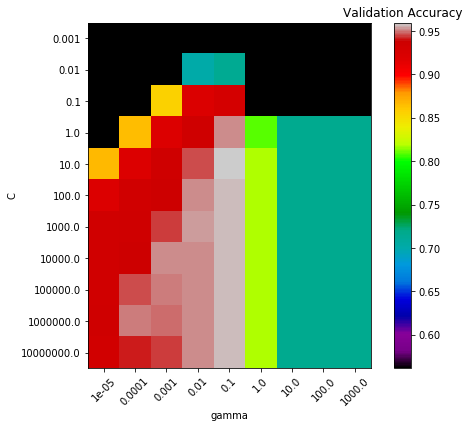

The best classifier is:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Best score:  0.962970498474


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


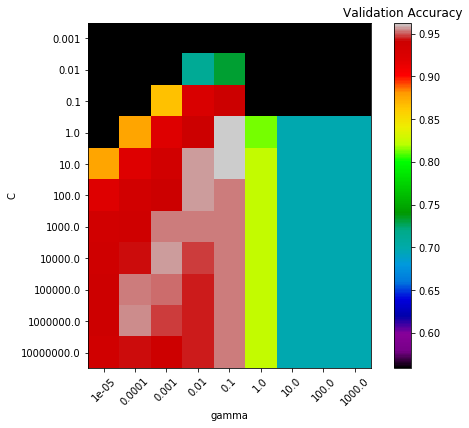

The best classifier is:  SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Best score:  0.961546286877


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


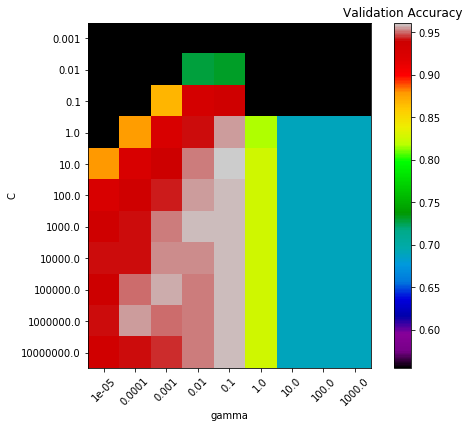

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import pylab as pl
X, Y = X_train, Y_train
scaler = StandardScaler()
X = scaler.fit_transform(X)
Time =[];Accuracy =[]

C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)
for train, test in kf.split(X_train):
        X_train_data = X_train[train]
        X_test_data = X_train[test]
        Y_train_data = Y_train[train]
        Y_test_data = Y_train[test]
        param_grid = dict(gamma=gamma_range, C=C_range)
        cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

        grid.fit(X_train_data,Y_train_data)
        
        print("The best classifier is: ", grid.best_estimator_)
        print("Best score: ",grid.best_score_)
        # plot the scores of the grid
        # grid_scores_ contains parameter settings and scores
        score_dict = grid.grid_scores_

        # We extract just the scores
        scores = [x[1] for x in score_dict]
        scores = np.array(scores).reshape(len(C_range), len(gamma_range))

        # Make a nice figure
        pl.figure(figsize=(8, 6))
        pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
        pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
        pl.xlabel('gamma')
        pl.ylabel('C')
        cl = pl.colorbar()
        cl.ax.set_title('Validation Accuracy')
        pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
        pl.yticks(np.arange(len(C_range)), C_range)
        pl.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The best classifier is:  SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score:  0.953204476094


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


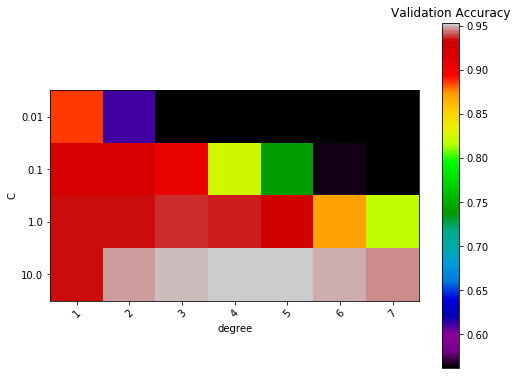

The best classifier is:  SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score:  0.961749745677


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


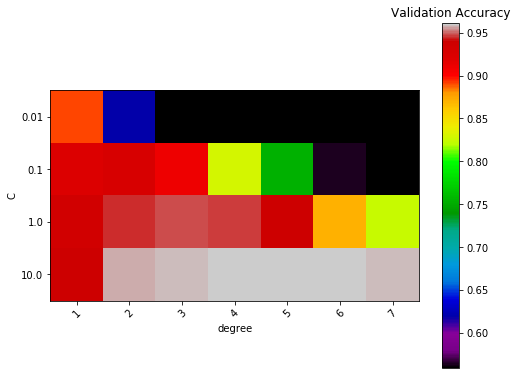

The best classifier is:  SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score:  0.956663275687


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


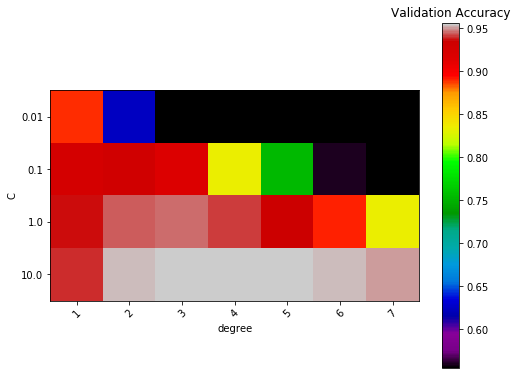

In [6]:
import time
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import pylab as pl
X, Y = X_train, Y_train
scaler = StandardScaler()
X = scaler.fit_transform(X)
Time =[];Accuracy =[]

C_range = 10. ** np.arange(-2, 2)
degree_range = np.arange(1, 8)
for train, test in kf.split(X_train):
        X_train_data = X_train[train]
        X_test_data = X_train[test]
        Y_train_data = Y_train[train]
        Y_test_data = Y_train[test]
        param_grid = dict(degree=degree_range, C=C_range)
        cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)

        grid.fit(X_train_data,Y_train_data)
        
        print("The best classifier is: ", grid.best_estimator_)
        print("Best score: ",grid.best_score_)
        # plot the scores of the grid
        # grid_scores_ contains parameter settings and scores
        score_dict = grid.grid_scores_

        # We extract just the scores
        scores = [x[1] for x in score_dict]
        scores = np.array(scores).reshape(len(C_range), len(degree_range))

        pl.figure(figsize=(8, 6))
        pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
        pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
        pl.xlabel('degree')
        pl.ylabel('C')
        cl = pl.colorbar()
        cl.ax.set_title('Validation Accuracy')
        pl.xticks(np.arange(len(degree_range)), degree_range, rotation=45)
        pl.yticks(np.arange(len(C_range)), C_range)
        pl.show()

**Best cross validation accuracy score obtained = 0.962970498474  
with the following parameters in "rbf" kernel  
(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma=0.10000000000000001,
kernel='rbf', max_iter=-1, probability=False, random_state=None,  
shrinking=True, tol=0.001, verbose=False)**